<a href="https://colab.research.google.com/github/sanara20221306-dot/CRM-CM-Course-Work/blob/main/CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install yahoofinancials

In [ ]:
#Task 1
#a
import pandas as pd
import requests

# URL of S&P 500 list
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

# Add User-Agent header to mimic a browser
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

# Fetch the HTML content with headers
response = requests.get(url, headers=headers)

# Extract tables from the page using the content from the response
tables = pd.read_html(response.text)

# The S&P 500 table is the second table on the page (index 1)
sp500_table = tables[1]

# Extract ticker symbols
tickers = sp500_table["Symbol"].str.replace('.', '-', regex=False).tolist()

# Display first few tickers
tickers[:10]

/tmp/ipython-input-3682333982.py:16: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A']

In [ ]:
#b
import yfinance as yf

# Set the historical data range
start_date = "2022-01-01"
end_date = "2025-01-01"

# Download daily OHLCV data for all extracted tickers
data = yf.download(
    tickers,
    start=start_date,
    end=end_date,
    group_by='ticker',
    auto_adjust=False
)

# Save a backup of the raw dataset
data.to_csv("sp500_raw_data.csv")

# Display the first few rows
data.head()


[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['Q', 'SOLS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1641013200, endDate = 1735707600")')


Ticker             VZ                                                        \
Price            Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2022-01-03  52.070000  52.560001  51.980000  52.439999  40.625950  18240100   
2022-01-04  52.639999  53.709999  52.549999  53.470001  41.423908  26376800   
2022-01-05  53.840000  54.639999  53.509998  54.020000  41.850006  28697300   
2022-01-06  54.480000  54.549999  53.660000  53.759998  41.648571  21563800   
2022-01-07  53.259998  54.360001  53.259998  54.240002  42.526707  26512500   

Ticker             ARE                                      ...         IP  \
Price             Open        High         Low       Close  ...        Low   
Date                                                        ...              
2022-01-03  223.160004  224.330002  215.960007  219.830002  ...  46.650002   
2022-01-04  220.869995  223.059998  219.899994  220.820007  ...  47.000000   
2022-01-05  210.000000  210.220001  205.169998  206.649994  ...  48.400002   
2022-01-06  207.800003  210.559998  205.610001  209.839996  ...  48.070000   
2022-01-07  208.279999  210.419998  207.899994  209.000000  ...  48.279999   

Ticker                                            UHS                          \
Price           Close  Adj Close   Volume        Open        High         Low   
Date                                                                            
2022-01-03  46.790001  39.097904  2808400  130.149994  132.149994  129.699997   
2022-01-04  48.470001  40.501724  4110600  132.300003  136.000000  132.199997   
2022-01-05  48.689999  40.685543  4216100  132.899994  137.720001  132.899994   
2022-01-06  48.340000  40.393097  2773900  134.000000  134.839996  130.570007   
2022-01-07  48.869999  40.835968  2796000  130.979996  133.570007  130.830002   

Ticker                                      
Price            Close   Adj Close  Volume  
Date                                        
2022-01-03  132.020004  129.432129  569400  
2022-01-04  133.820007  131.196869  570900  
2022-01-05  133.800003  131.177246  664100  
2022-01-06  130.979996  128.412491  669000  
2022-01-07  131.970001  129.383102  757300  

[5 rows x 3018 columns]

In [ ]:
from yahoofinancials import YahooFinancials

#Example for one stock
yahoo_fin = YahooFinancials('AAPL')
historical_data = yahoo_fin.get_historical_price_data('2022-01-01', '2025-01-01', 'daily')

print(historical_data)

{'AAPL': {'eventsData': {}}}


In [ ]:
#c
#Extract 'Close' price data from the multi-index DataFrame
close_prices = data.xs('Close', level='Price', axis=1)

# Remove tickers that have more than 20% missing data
threshold = 0.8 * len(close_prices)
clean_data = close_prices.dropna(axis=1, thresh=threshold)

# Optionally, fill the remaining gaps using forward-fill and backward-fill methods
clean_data = clean_data.fillna(method='ffill').fillna(method='bfill')

# Display the shape of the cleaned data to confirm the cleaning process
print("After cleaning:", clean_data.shape)

# The original 'tickers' list may still include tickers with missing data from the initial scrape.
# To accurately track which tickers were removed due to missing data, compare the columns
# of the cleaned data to the columns of the initial close_prices DataFrame.
print("Removed tickers due to missing data:", len(close_prices.columns) - clean_data.shape[1])

After cleaning: (753, 496)
Removed tickers due to missing data: 7


/tmp/ipython-input-1383406851.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  clean_data = clean_data.fillna(method='ffill').fillna(method='bfill')


In [ ]:
# Download OHLCV + Adjusted Close
data = yf.download(tickers, start=start_date, end=end_date, group_by=False, auto_adjust=False)

print("Shape of downloaded dataset:", data.shape)
data.head()

[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['Q', 'SOLS']: YFPricesMissingError('possibly delisted; no price data found  (1d 2022-01-01 -> 2025-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1641013200, endDate = 1735707600")')


Shape of downloaded dataset: (753, 3018)


Ticker             ARE                                                  \
Price             Open        High         Low       Close   Adj Close   
Date                                                                     
2022-01-03  223.160004  224.330002  215.960007  219.830002  185.847839   
2022-01-04  220.869995  223.059998  219.899994  220.820007  186.684830   
2022-01-05  210.000000  210.220001  205.169998  206.649994  174.705246   
2022-01-06  207.800003  210.559998  205.610001  209.839996  177.402115   
2022-01-07  208.279999  210.419998  207.899994  209.000000  176.691986   

Ticker                      VZ                                   ...  \
Price        Volume       Open       High        Low      Close  ...   
Date                                                             ...   
2022-01-03   769800  52.070000  52.560001  51.980000  52.439999  ...   
2022-01-04   565000  52.639999  53.709999  52.549999  53.470001  ...   
2022-01-05  4849000  53.840000  54.639999  53.509998  54.020000  ...   
2022-01-06  1805000  54.480000  54.549999  53.660000  53.759998  ...   
2022-01-07  1322800  53.259998  54.360001  53.259998  54.240002  ...   

Ticker             IP                                        UHS              \
Price             Low      Close  Adj Close   Volume        Open        High   
Date                                                                           
2022-01-03  46.650002  46.790001  39.097904  2808400  130.149994  132.149994   
2022-01-04  47.000000  48.470001  40.501717  4110600  132.300003  136.000000   
2022-01-05  48.400002  48.689999  40.685551  4216100  132.899994  137.720001   
2022-01-06  48.070000  48.340000  40.393097  2773900  134.000000  134.839996   
2022-01-07  48.279999  48.869999  40.835957  2796000  130.979996  133.570007   

Ticker                                                  
Price              Low       Close   Adj Close  Volume  
Date                                                    
2022-01-03  129.699997  132.020004  129.432144  569400  
2022-01-04  132.199997  133.820007  131.196854  570900  
2022-01-05  132.899994  133.800003  131.177246  664100  
2022-01-06  130.570007  130.979996  128.412521  669000  
2022-01-07  130.830002  131.970001  129.383148  757300  

[5 rows x 3018 columns]

In [ ]:
#Task 2
#a
import pandas as pd
import numpy as np

# 'data' is the multi-index DataFrame from yf.download containing OHLCV and Adj Close prices.
# 'clean_data' currently holds cleaned 'Close' prices.
# For daily returns, it's best practice to use 'Adj Close' prices.

# Extract 'Adj Close' prices for all tickers
adj_close_prices = data.xs('Adj Close', level='Price', axis=1)
print(f"Shape of adj_close_prices after extraction: {adj_close_prices.shape}")
print("Head of adj_close_prices:")
print(adj_close_prices.head())

# Remove tickers that have more than 20% missing data, similar to how 'clean_data' was processed
# The threshold is 80% of the total number of days
threshold = 0.8 * len(adj_close_prices) # Recalculate threshold based on adj_close_prices rows
clean_adj_close_data = adj_close_prices.dropna(axis=1, thresh=threshold)
print(f"Shape of clean_adj_close_data after dropping columns: {clean_adj_close_data.shape}")
print("Head of clean_adj_close_data:")
print(clean_adj_close_data.head())


# Fill any remaining gaps using forward-fill and backward-fill methods
# This ensures no NaNs remain which would affect pct_change()
# Addressing FutureWarning: DataFrame.fillna with 'method' is deprecated
clean_adj_close_data = clean_adj_close_data.ffill().bfill() # Updated for FutureWarning

# Check if clean_adj_close_data is empty
if clean_adj_close_data.empty:
    print("\nWARNING: 'clean_adj_close_data' is empty. This means no tickers had sufficient 'Adj Close' data after cleaning.")
    print("Please check the 'data' DataFrame from the previous step (yf.download) to ensure 'Adj Close' prices were correctly downloaded for S&P 500 stocks, excluding the problematic tickers like 'Q' and 'SOLS'.")
    # To prevent further errors, we explicitly set daily_returns to an empty DataFrame
    daily_returns = pd.DataFrame()
else:
    # Step 1: Calculate daily returns for each stock
    daily_returns = clean_adj_close_data.pct_change().dropna()

# Display the first few rows of daily returns
print("Shape of cleaned Adj Close data:", clean_adj_close_data.shape)
print("Shape of daily returns data:", daily_returns.shape)
print("Daily returns head:")
print(daily_returns.head())

Shape of adj_close_prices after extraction: (753, 503)
Head of adj_close_prices:
Ticker             ARE         VZ       NWSA         DTE        CDNS  \
Date                                                                   
2022-01-03  185.847839  40.625942  21.957317  105.239052  183.160004   
2022-01-04  186.684830  41.423901  21.783741  105.415649  178.300003   
2022-01-05  174.705246  41.849998  21.050867  105.300842  172.619995   
2022-01-06  177.402115  41.648571  21.725882  105.583427  173.119995   
2022-01-07  176.691986  42.526711  21.696955  105.689384  166.020004   

Ticker            WEC       CSCO  CEG        EQR         DPZ  ...         MMC  \
Date                                                          ...               
2022-01-03  83.745125  56.096851  NaN  78.473495  525.715759  ...  157.690872   
2022-01-04  83.535942  54.721008  NaN  79.498985  508.667694  ...  157.615479   
2022-01-05  84.503342  53.854401  NaN  77.956421  494.651031  ...  155.427811   
2022-01-0

In [ ]:
#Task 2
#b
market_data = yf.download('^GSPC', start='2022-01-01', end='2025-01-01')
market_returns = market_data['Close'].pct_change().dropna()

# Step 3: Calculate beta for each stock
beta_values = {}

for ticker in daily_returns.columns:
    stock_returns = daily_returns[ticker].dropna()

    # Align dates with market data
    aligned = pd.concat([stock_returns, market_returns], axis=1).dropna()
    stock_r, market_r = aligned.iloc[:, 0], aligned.iloc[:, 1]

    corr = stock_r.corr(market_r)
    stock_std = stock_r.std()
    market_std = market_r.std()

    beta = corr * (stock_std / market_std)
    beta_values[ticker] = beta

# Create DataFrame
beta_df = pd.DataFrame(list(beta_values.items()), columns=['Ticker', 'Beta'])
beta_df.sort_values(by='Beta', ascending=False).head(10)


/tmp/ipython-input-1527956804.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  market_data = yf.download('^GSPC', start='2022-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


,Ticker,Beta
88,COIN,2.960959
344,XYZ,2.544784
433,NVDA,2.268515
94,APP,2.261933
402,TTD,2.237123
61,PLTR,2.189588
453,MPWR,2.134132
446,AMD,2.064749
273,DASH,2.004918
458,HOOD,1.984828


In [ ]:
#C
from sklearn.preprocessing import StandardScaler

# Convert volatility dictionary to DataFrame
daily_volatility = daily_returns.std()
annual_volatility = daily_volatility * np.sqrt(252)

# Create volatility DataFrame
volatility_df = pd.DataFrame({
    'Ticker': daily_returns.columns,
    'Daily Volatility': daily_volatility.values,
    'Annual Volatility': annual_volatility.values,
    'Beta': [beta_values[ticker] for ticker in daily_volatility.index] # Correctly get Beta for each ticker
})

# Scale the Beta values
scaler = StandardScaler()
beta_df['Beta_scaled'] = scaler.fit_transform(beta_df[['Beta']])

volatility_df.sort_values(by='Annual Volatility', ascending=False).head(10)

,Ticker,Daily Volatility,Annual Volatility,Beta
88,COIN,0.060087,0.953848,2.960959
135,SMCI,0.056818,0.901957,1.855255
94,APP,0.049663,0.788374,2.261933
61,PLTR,0.043525,0.690932,2.189588
344,XYZ,0.041187,0.653825,2.544784
458,HOOD,0.041057,0.651759,1.984828
402,TTD,0.040799,0.647665,2.237123
65,TSLA,0.038618,0.613038,1.957041
196,MRNA,0.038024,0.603608,1.427285
268,EPAM,0.037945,0.602363,1.519526


In [ ]:
#Task 3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

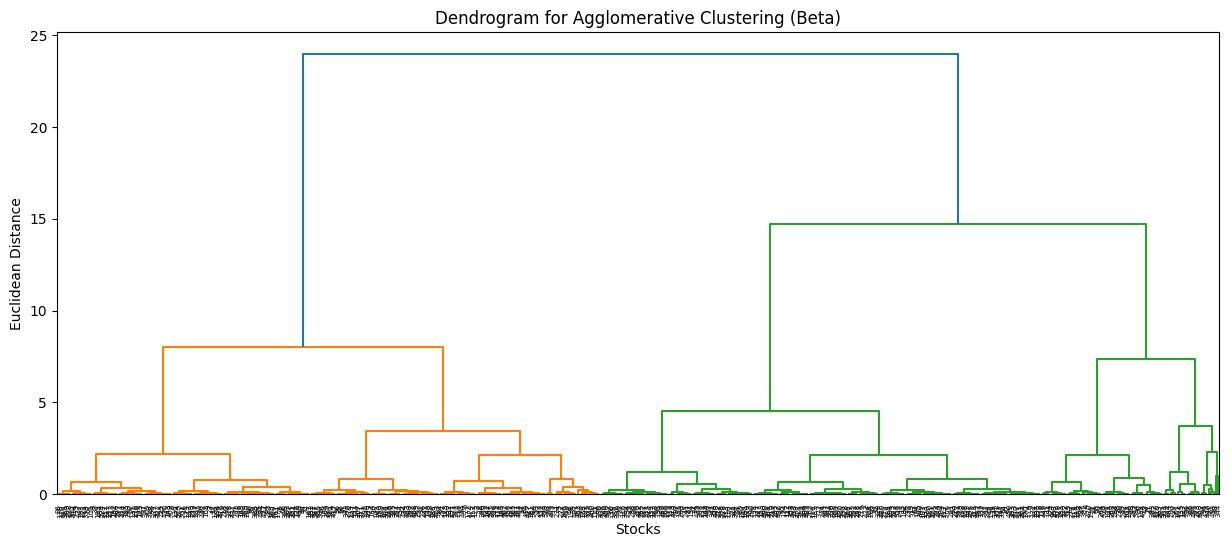

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
dendrogram = sch.dendrogram(sch.linkage(beta_df["Beta_scaled"].values.reshape(-1, 1), method='ward'))
plt.title("Dendrogram for Agglomerative Clustering (Beta)")
plt.xlabel("Stocks")
plt.ylabel("Euclidean Distance")
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Choose best K after observing dendrogram
K = 3   # example – update based on your dendrogram

agg = AgglomerativeClustering(
    n_clusters=K,
    metric='euclidean',
    linkage='ward'
)

# Perform clustering on the scaled beta values
# and add the cluster labels to the beta_df DataFrame.
beta_df["Agg_Cluster"] = agg.fit_predict(beta_df[['Beta_scaled']])

# Display the head of beta_df with the new cluster column
beta_df.head()

,Ticker,Beta,Beta_scaled,Agg_Cluster
0,ARE,0.994272,0.147502,2
1,VZ,0.324780,-1.457551,0
2,NWSA,1.040953,0.259414,2
3,DTE,0.411800,-1.248928,0
4,CDNS,1.414493,1.154945,1


In [ ]:
cluster_summary = beta_df.groupby("Agg_Cluster")["Beta"].agg(["mean", "min", "max", "count"])
cluster_summary

,mean,min,max,count
Agg_Cluster,,,,
0,0.594141,0.108994,0.877683,232
1,1.650072,1.327748,2.960959,76
2,1.060620,0.883542,1.302100,188


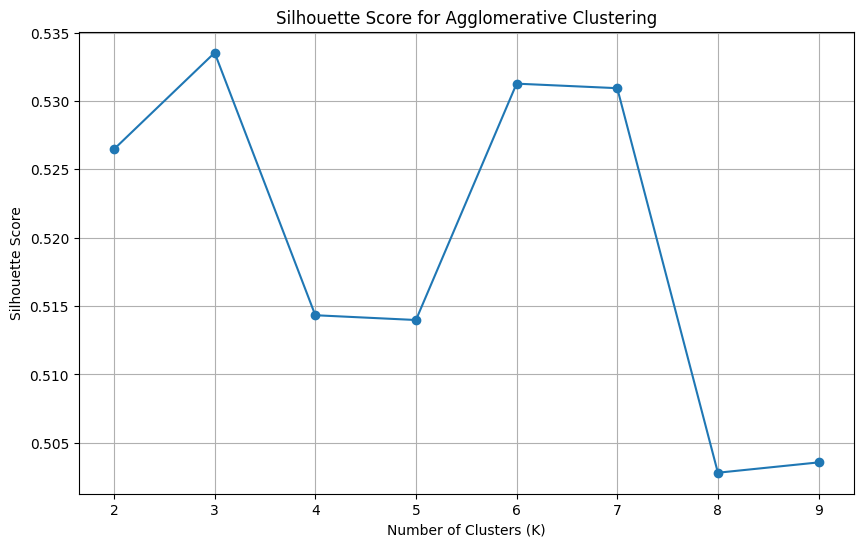

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Use the same data used for the dendrogram
X = beta_df["Beta_scaled"].values.reshape(-1, 1)

# Try silhouette scores for K = 2 to 10
K_values = range(2, 10)
silhouette_scores = []

for k in K_values:
    model = AgglomerativeClustering(
        n_clusters=k,
        metric='euclidean',
        linkage='ward'
    )
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot Silhouette Score Diagram
plt.figure(figsize=(10, 6))
plt.plot(K_values, silhouette_scores, marker='o')
plt.title("Silhouette Score for Agglomerative Clustering")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Replace with the best K you selected (example: K = 3)
K = 3

model = AgglomerativeClustering(
    n_clusters=K,
    metric='euclidean',
    linkage='ward'
)

beta_df["Agg_Cluster"] = model.fit_predict(X)

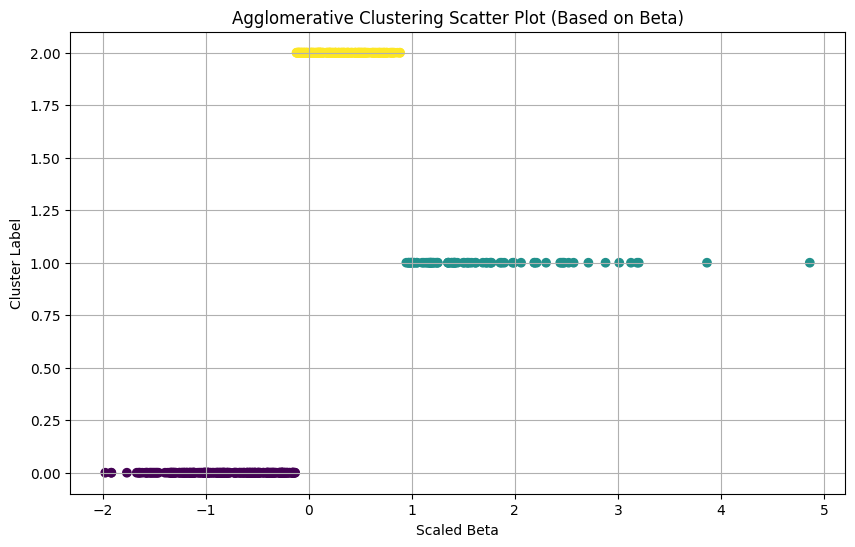

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(
    beta_df["Beta_scaled"],         # X-axis
    beta_df["Agg_Cluster"],         # Y-axis (cluster assignment)
    c=beta_df["Agg_Cluster"],
    cmap='viridis'
)

plt.title("Agglomerative Clustering Scatter Plot (Based on Beta)")
plt.xlabel("Scaled Beta")
plt.ylabel("Cluster Label")
plt.grid(True)
plt.show()

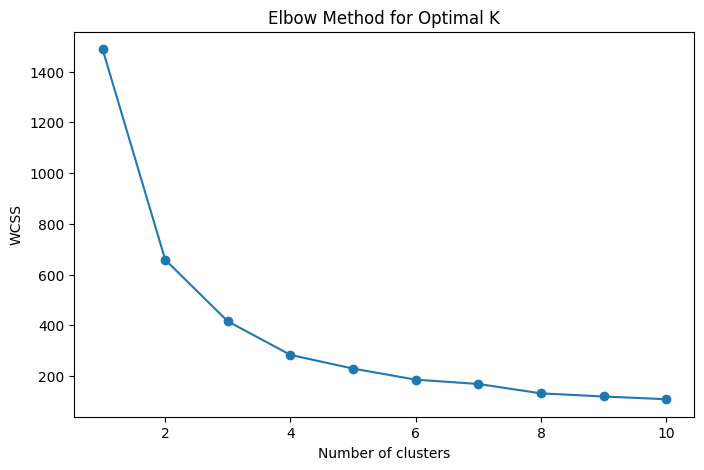

In [ ]:
#Task 4
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Feature preparation: Beta and Annual Volatility
# Use volatility_df directly, as it already contains the Beta and Annual Volatility for the cleaned tickers
features_df = volatility_df.set_index('Ticker').rename(columns={'Annual Volatility': 'Volatility'})

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)

# Elbow Method to determine optimal K
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto') # Added n_init='auto' to suppress FutureWarning
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Silhouette Analysis to determine optimal K
K_range = range(2, 11) # K-Means requires at least 2 clusters for silhouette score
sil_scores = {}

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(scaled_features)
    sil = silhouette_score(scaled_features, labels)
    sil_scores[k] = sil

print("\nSilhouette Scores:")
for k, score in sil_scores.items():
    print(f"K = {k}: {score}")



Silhouette Scores:
K = 2: 0.5565133769200727
K = 3: 0.4394844211109698
K = 4: 0.431251019323823
K = 5: 0.3886603489488164
K = 6: 0.3911850862097903
K = 7: 0.3794290787898677
K = 8: 0.3838345501886343
K = 9: 0.3853594129016194
K = 10: 0.3808735428893676


In [ ]:
optimal_k = max(sil_scores, key=sil_scores.get)
print("Optimal K =", optimal_k)

Optimal K = 2


In [ ]:
# K-Means clustering with chosen optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(scaled_features)
features_df['KMeansCluster'] = clusters

# Display first few rows with clusters
features_df.head()

,Daily Volatility,Volatility,Beta,KMeansCluster
Ticker,,,,
ARE,0.019372,0.307515,0.994272,0
VZ,0.014037,0.222833,0.324780,0
NWSA,0.018095,0.287241,1.040953,0
DTE,0.012592,0.199891,0.411800,0
CDNS,0.021939,0.348272,1.414493,1


In [ ]:
cluster_profile = features_df.groupby('KMeansCluster')[['Beta','Volatility']].describe()
print("\nCluster Profiles:")
print(cluster_profile.to_string())


Cluster Profiles:
                Beta                                                                       Volatility                                                                      
               count      mean       std       min       25%       50%       75%       max      count      mean       std       min       25%       50%       75%       max
KMeansCluster                                                                                                                                                              
0              378.0  0.767040  0.267760  0.108994  0.552679  0.789663  0.978517  1.339928      378.0  0.266599  0.048410  0.156193  0.229953  0.264304  0.298362  0.416835
1              118.0  1.463572  0.365602  0.535427  1.236982  1.424247  1.630499  2.960959      118.0  0.452104  0.106343  0.325537  0.381736  0.422507  0.486856  0.953848


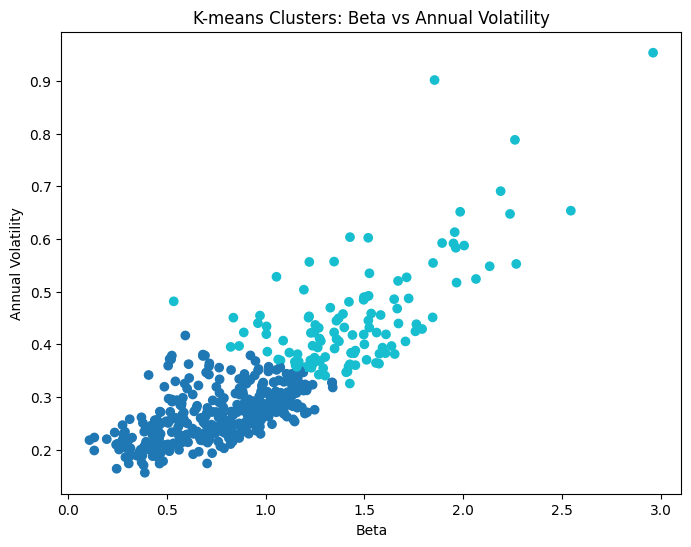

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(features_df['Beta'], features_df['Volatility'],
            c=features_df['KMeansCluster'], cmap='tab10')
plt.xlabel("Beta")
plt.ylabel("Annual Volatility")
plt.title("K-means Clusters: Beta vs Annual Volatility")
plt.show()

In [ ]:
cluster_summary = features_df.groupby('KMeansCluster').mean()
cluster_summary

,Daily Volatility,Volatility,Beta
KMeansCluster,,,
0,0.016794,0.266599,0.767040
1,0.028480,0.452104,1.463572


In [ ]:
features_df.to_csv("kmeans_clusters_beta_volatility.csv")
from google.colab import files
files.download("kmeans_clusters_beta_volatility.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Task 5
#b
# Cluster summary table (Beta & Volatility statistics)
cluster_summary = features_df.groupby('KMeansCluster')[['Beta', 'Volatility']].agg(['mean','std','min','max','count'])

print("Cluster Summary:")
print(cluster_summary.to_string())

Cluster Summary:
                   Beta                                     Volatility                                    
                   mean       std       min       max count       mean       std       min       max count
KMeansCluster                                                                                             
0              0.767040  0.267760  0.108994  1.339928   378   0.266599  0.048410  0.156193  0.416835   378
1              1.463572  0.365602  0.535427  2.960959   118   0.452104  0.106343  0.325537  0.953848   118


In [ ]:
# Compute average daily return for each stock
avg_daily_return = daily_returns.mean()

# Attach to cluster dataset (using features_df instead of X)
features_df['Avg_Daily_Return'] = avg_daily_return

# Compute cluster-level averages
daily_ret_cluster = features_df.groupby('KMeansCluster')['Avg_Daily_Return'].mean()

print("\nAverage Daily Return per Cluster:")
print(daily_ret_cluster.to_string())


Average Daily Return per Cluster:
KMeansCluster
0    0.00036
1    0.00057


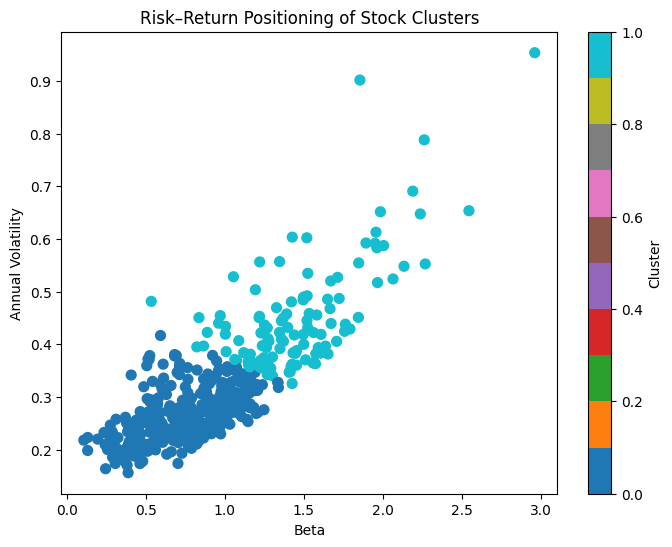

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(features_df['Beta'], features_df['Volatility'],
            c=features_df['KMeansCluster'], cmap='tab10', s=50)

plt.xlabel("Beta")
plt.ylabel("Annual Volatility")
plt.title("Risk–Return Positioning of Stock Clusters")
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
#download cluster results

features_df.to_csv("clustered_stock_risk_profiles.csv")
from google.colab import files
files.download("clustered_stock_risk_profiles.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>